### Codon Usage Classification

### Exploratory Data Analysis (EDA)

In [82]:
import pandas as pd  
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')
color_pal = sns.color_palette("colorblind")

### 1. Basic Information about the Dataset

In [83]:
df = pd.read_csv('../raw_data/codon_usage.csv');

df.head()

/tmp/ipykernel_165079/3773260421.py:1: DtypeWarning: Columns (5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../raw_data/codon_usage.csv');


,Kingdom,DNAtype,SpeciesID,Ncodons,SpeciesName,UUU,UUC,UUA,UUG,CUU,...,CGG,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA
0,vrl,0,100217,1995,Epizootic haematopoietic necrosis virus,0.01654,0.01203,0.00050,0.00351,0.01203,...,0.00451,0.01303,0.03559,0.01003,0.04612,0.01203,0.04361,0.00251,0.00050,0.00000
1,vrl,0,100220,1474,Bohle iridovirus,0.02714,0.01357,0.00068,0.00678,0.00407,...,0.00136,0.01696,0.03596,0.01221,0.04545,0.01560,0.04410,0.00271,0.00068,0.00000
2,vrl,0,100755,4862,Sweet potato leaf curl virus,0.01974,0.0218,0.01357,0.01543,0.00782,...,0.00596,0.01974,0.02489,0.03126,0.02036,0.02242,0.02468,0.00391,0.00000,0.00144
3,vrl,0,100880,1915,Northern cereal mosaic virus,0.01775,0.02245,0.01619,0.00992,0.01567,...,0.00366,0.01410,0.01671,0.03760,0.01932,0.03029,0.03446,0.00261,0.00157,0.00000
4,vrl,0,100887,22831,Soil-borne cereal mosaic virus,0.02816,0.01371,0.00767,0.03679,0.01380,...,0.00604,0.01494,0.01734,0.04148,0.02483,0.03359,0.03679,0.00000,0.00044,0.00131


In [99]:
df.shape

(13028, 71)

In [84]:
print(df.columns.to_list())

['Kingdom', 'DNAtype', 'SpeciesID', 'Ncodons', 'SpeciesName', 'UUU', 'UUC', 'UUA', 'UUG', 'CUU', 'CUC', 'CUA', 'CUG', 'AUU', 'AUC', 'AUA', 'AUG', 'GUU', 'GUC', 'GUA', 'GUG', 'GCU', 'GCC', 'GCA', 'GCG', 'CCU', 'CCC', 'CCA', 'CCG', 'UGG', 'GGU', 'GGC', 'GGA', 'GGG', 'UCU', 'UCC', 'UCA', 'UCG', 'AGU', 'AGC', 'ACU', 'ACC', 'ACA', 'ACG', 'UAU', 'UAC', 'CAA', 'CAG', 'AAU', 'AAC', 'UGU', 'UGC', 'CAU', 'CAC', 'AAA', 'AAG', 'CGU', 'CGC', 'CGA', 'CGG', 'AGA', 'AGG', 'GAU', 'GAC', 'GAA', 'GAG', 'UAA', 'UAG', 'UGA']


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13028 entries, 0 to 13027
Data columns (total 69 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Kingdom      13028 non-null  object 
 1   DNAtype      13028 non-null  int64  
 2   SpeciesID    13028 non-null  int64  
 3   Ncodons      13028 non-null  int64  
 4   SpeciesName  13028 non-null  object 
 5   UUU          13028 non-null  object 
 6   UUC          13028 non-null  object 
 7   UUA          13028 non-null  float64
 8   UUG          13028 non-null  float64
 9   CUU          13028 non-null  float64
 10  CUC          13028 non-null  float64
 11  CUA          13028 non-null  float64
 12  CUG          13028 non-null  float64
 13  AUU          13028 non-null  float64
 14  AUC          13028 non-null  float64
 15  AUA          13028 non-null  float64
 16  AUG          13028 non-null  float64
 17  GUU          13028 non-null  float64
 18  GUC          13028 non-null  float64
 19  GUA 

 Renaming the columns for clarity. References of these values were gathered in the UCI Repository dataset description.

In [86]:
K_names = {'arc': 'archaea', 
          'bct': ' bacteria', 
          'phg' : 'bacteriophage', 
          'plm': 'plasmid',
          'pln': 'plant',
          'inv': 'invertebrate',
          'vrt': 'vertebrate',
          'mam': 'mammal',
          'rod': 'rodent',
          'pri': 'primate', 
          'vrl': 'virus'} 

K_names2 = {0: 'archaea',
            1: ' bacteria',
            2 : 'bacteriophage',
            3: 'plasmid',
            4: 'plant',
            5: 'invertebrate',
            6: 'vertebrate',
            7: 'mammal',
            8: 'rodent',
            9: 'primate', 
            10: 'virus'} 

DNA_names = {0:'genomic',
           1:'mitochondrial', 
           2:'chloroplast', 
           3:'cyanelle', 
           4:'plastid', 
           5:'nucleomorph', 
           6:'secondary_endosymbiont', 
           7:'chromoplast', '8':'leucoplast', 
           9:'NA',
           10:'proplastid',
           11:'apicoplast', 
           12:'kinetoplast'}

In [87]:
df_a = df
df_b = df_a.replace({"Kingdom":K_names})
df_a['Kingdom_Names'] = df_b['Kingdom']

df_b = df_a.replace({"DNAtype":DNA_names})
df_a['DNA_Types'] = df_b['DNAtype']

### Frequency By Kingdom 

/tmp/ipykernel_165079/1924437841.py:3: UserWarning: 
The palette list has fewer values (10) than needed (11) and will cycle, which may produce an uninterpretable plot.
  ax = sns.barplot(y="Kingdom_Names", x="count", data=df_kingdom_counts, hue="Kingdom_Names", palette=color_pal)


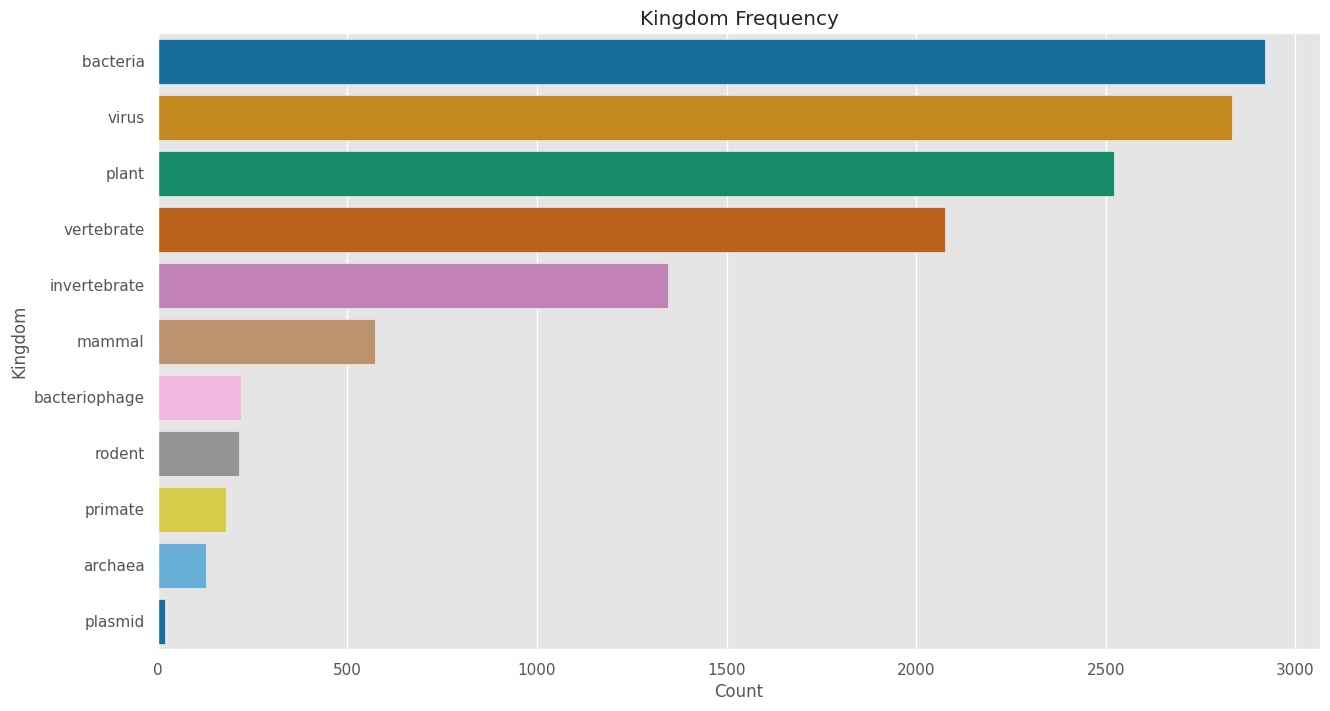

Kingdom_Names
 bacteria        2920
virus            2832
plant            2523
vertebrate       2077
invertebrate     1345
mammal            572
bacteriophage     220
rodent            215
primate           180
archaea           126
plasmid            18
Name: count, dtype: int64

In [88]:

df_kingdom_counts = df_a['Kingdom_Names'].value_counts().reset_index()

ax = sns.barplot(y="Kingdom_Names", x="count", data=df_kingdom_counts, hue="Kingdom_Names", palette=color_pal)
ax.set(ylabel="Kingdom", xlabel="Count", title="Kingdom Frequency")

plt.show()

df_a['Kingdom_Names'].value_counts()


### Frequency By DNA Type

/tmp/ipykernel_165079/3411752481.py:3: UserWarning: 
The palette list has fewer values (10) than needed (11) and will cycle, which may produce an uninterpretable plot.
  ax = sns.barplot(y="DNA_Types", x="count", data = df_dnatype_counts, hue="DNA_Types", palette=color_pal)


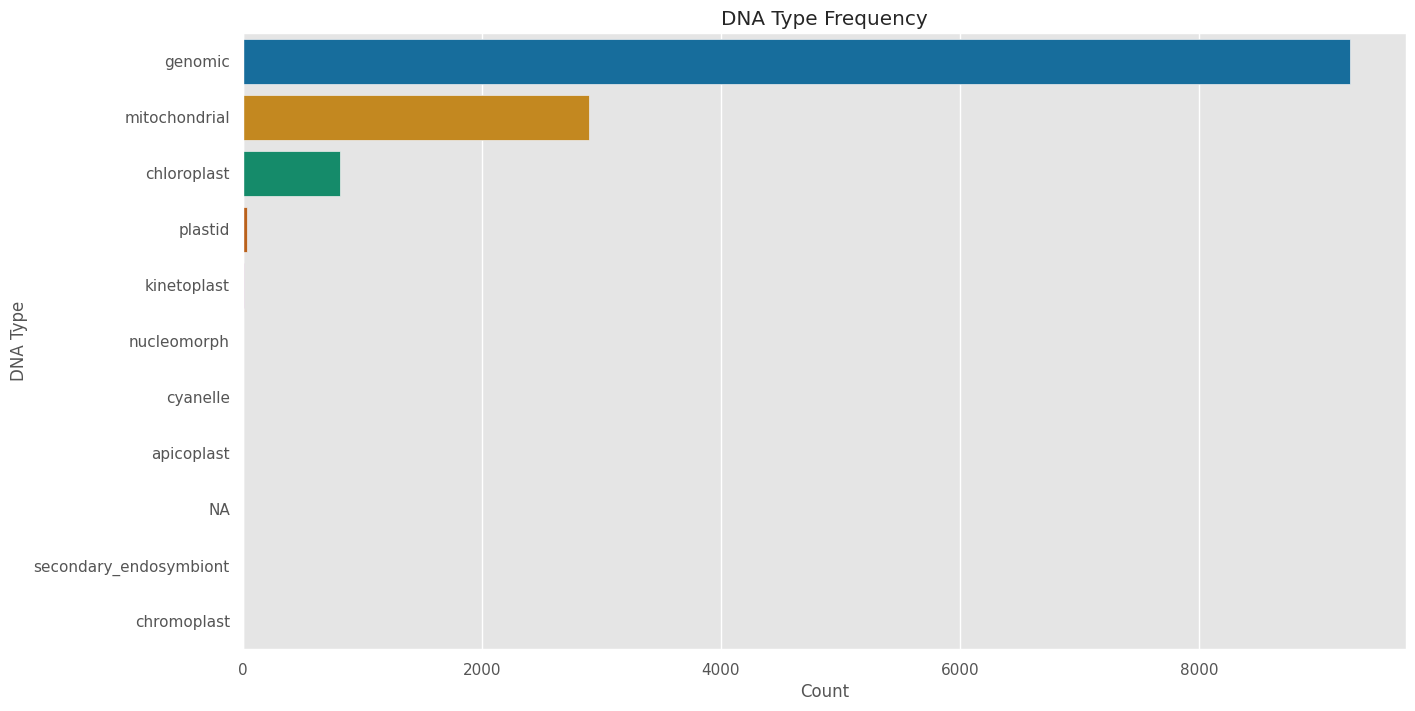

DNA_Types
genomic                   9267
mitochondrial             2899
chloroplast                816
plastid                     31
kinetoplast                  5
nucleomorph                  2
cyanelle                     2
apicoplast                   2
NA                           2
secondary_endosymbiont       1
chromoplast                  1
Name: count, dtype: int64

In [89]:
df_dnatype_counts = df_a['DNA_Types'].value_counts().reset_index()

ax = sns.barplot(y="DNA_Types", x="count", data = df_dnatype_counts, hue="DNA_Types", palette=color_pal)
ax.set(ylabel="DNA Type", xlabel="Count", title="DNA Type Frequency")

plt.show()
df_a['DNA_Types'].value_counts()


### Distribution of Codons by Kingdom

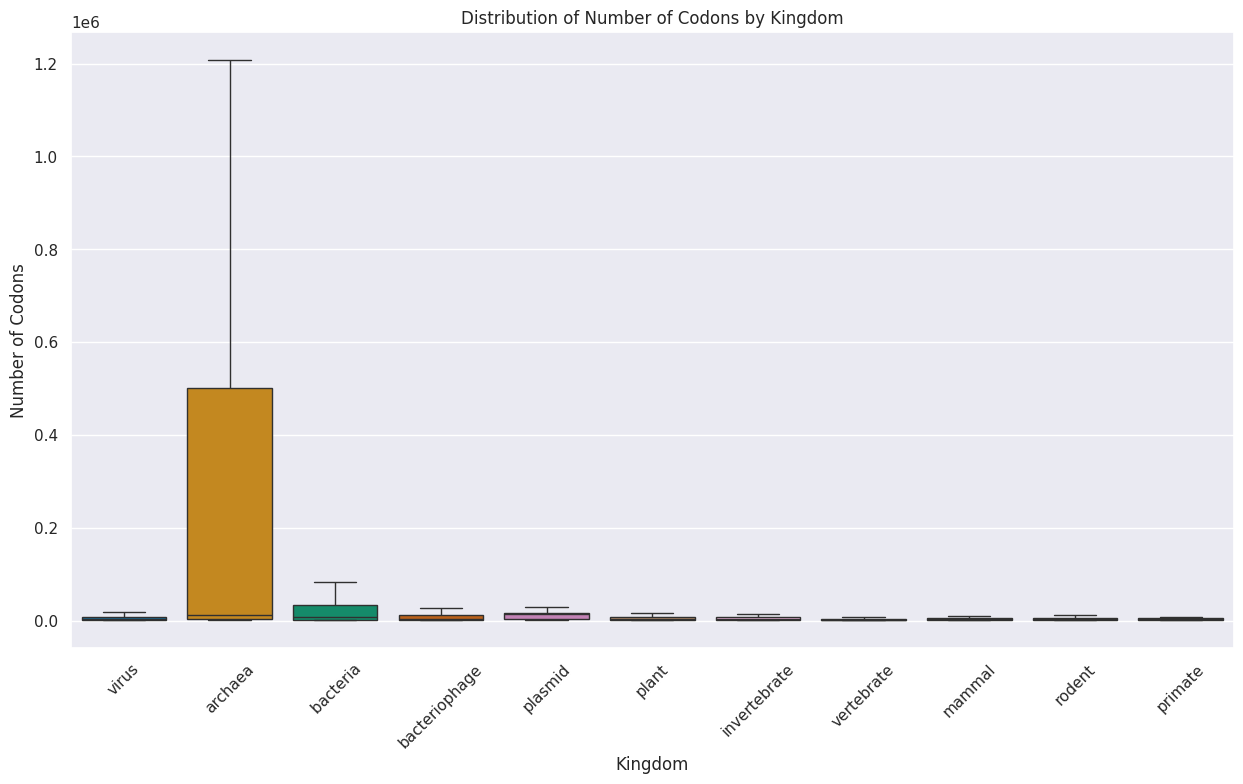

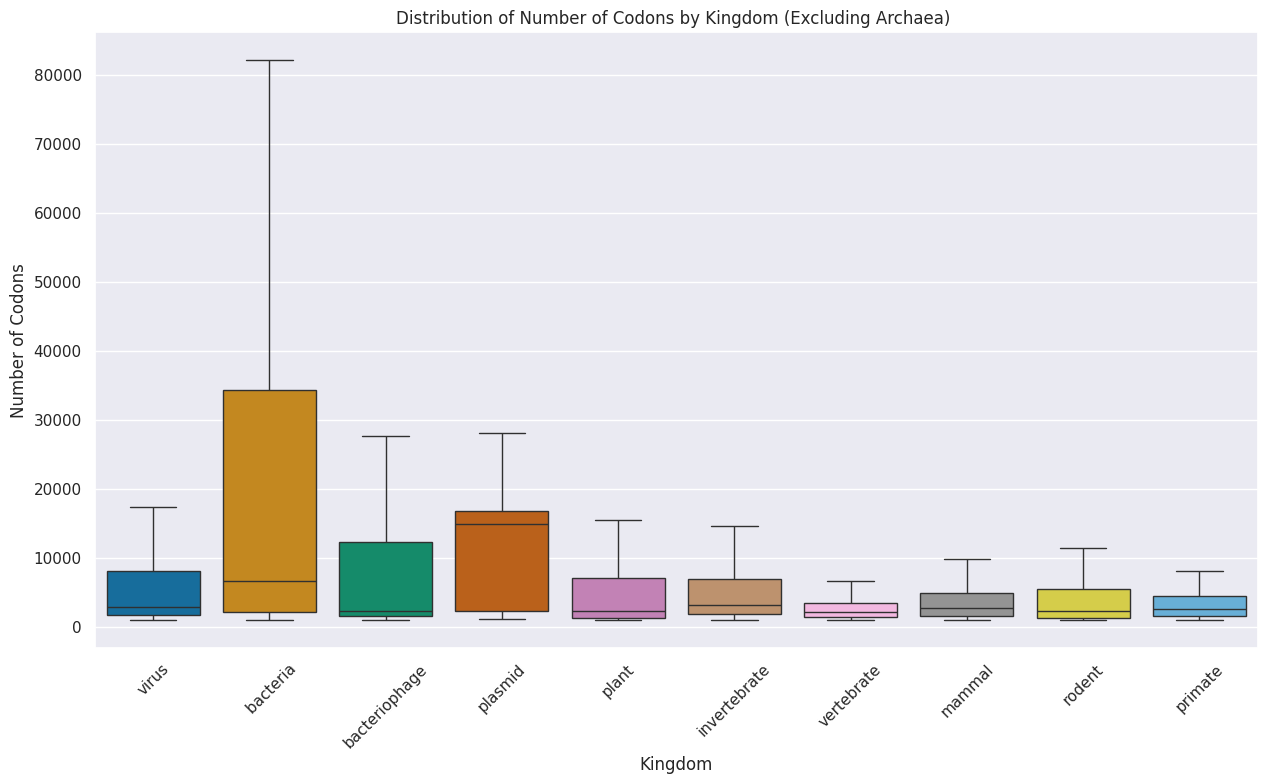

In [101]:
more_color = sns.color_palette("colorblind", n_colors=11)

sns.set(rc = {'figure.figsize':(15,8)})
ax = sns.boxplot(x="Kingdom_Names", y="Ncodons",data=df_a, hue="Kingdom_Names", palette=more_color, showfliers=False)
ax.set(xlabel='Kingdom', ylabel='Number of Codons',
       title = 'Distribution of Number of Codons by Kingdom')
plt.xticks(rotation=45)
plt.show()

# Since archaea is an outlier
df_without_archaea= df_a[df_a['Kingdom_Names'] != 'archaea']
hue_order = df_without_archaea['Kingdom_Names'].unique()


ax = sns.boxplot(x="Kingdom_Names", y="Ncodons", 
            data=df_without_archaea, hue="Kingdom_Names", hue_order=hue_order, palette=color_pal, showfliers=False)
ax.set(xlabel='Kingdom', ylabel='Number of Codons', 
       title = 'Distribution of Number of Codons by Kingdom (Excluding Archaea) ')
plt.xticks(rotation=45)
plt.show()


### Distribution of Codons by DNA Type

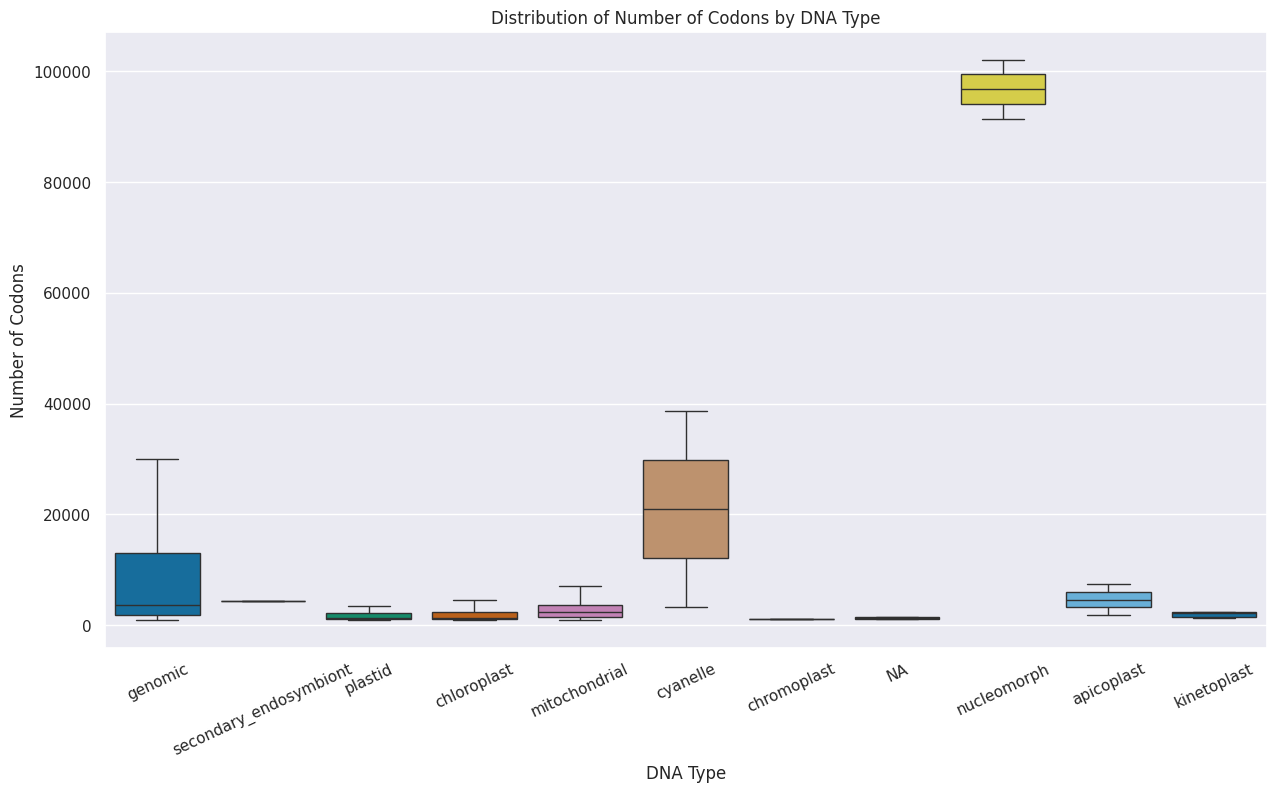

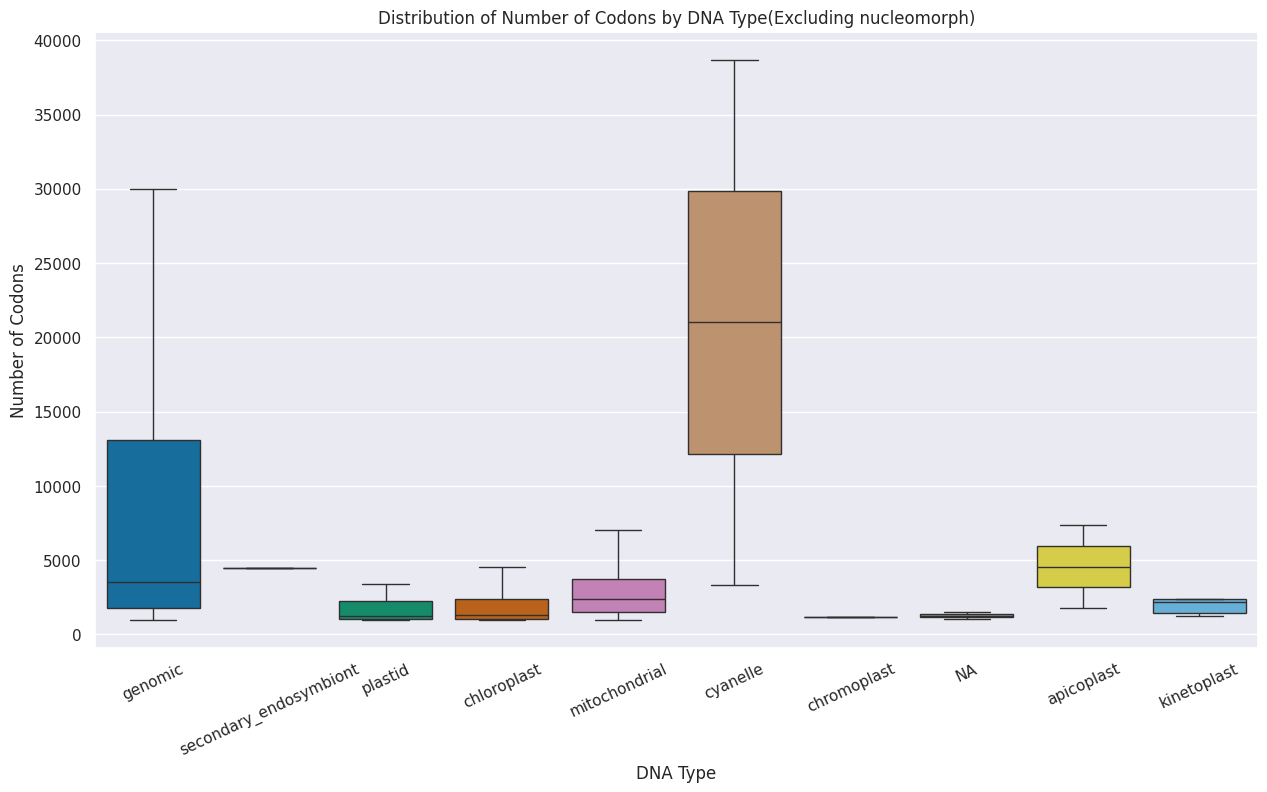

In [98]:
sns.set(rc = {'figure.figsize':(15,8)})
ax = sns.boxplot(x="DNA_Types", y="Ncodons",data=df_a, hue="DNA_Types", palette=more_color, showfliers=False)
ax.set(xlabel='DNA Type', ylabel='Number of Codons',
       title = 'Distribution of Number of Codons by DNA Type')
plt.xticks(rotation=25)

plt.show()

# Since nucleomorph is an outlier
df_without_nucleomorph = df_a[df_a['DNA_Types'] != 'nucleomorph']
ax = sns.boxplot(x="DNA_Types", y="Ncodons", 
            data= df_without_nucleomorph, palette=color_pal, hue="DNA_Types",showfliers = False)
ax.set(xlabel='DNA Type', ylabel='Number of Codons',
       title = 'Distribution of Number of Codons by DNA Type(excluding nucleomorph)')
plt.xticks(rotation=25)
plt.show()